## This is Just Some Basic Code for making a GIF for a 5D STEM DataSet

Carter Francis | csfrancis@wisc.edu | 2024-02-29

In [1]:
import matplotlib.pyplot as plt
import hyperspy.api as hs

In [5]:
import pyxem as pxm
import hyperspy.api as hs
import zarr
from gif_plot import 

In [ ]:
hs.load("

In [87]:
nav = stacked.sum(axis=stacked.axes_manager.signal_axes)

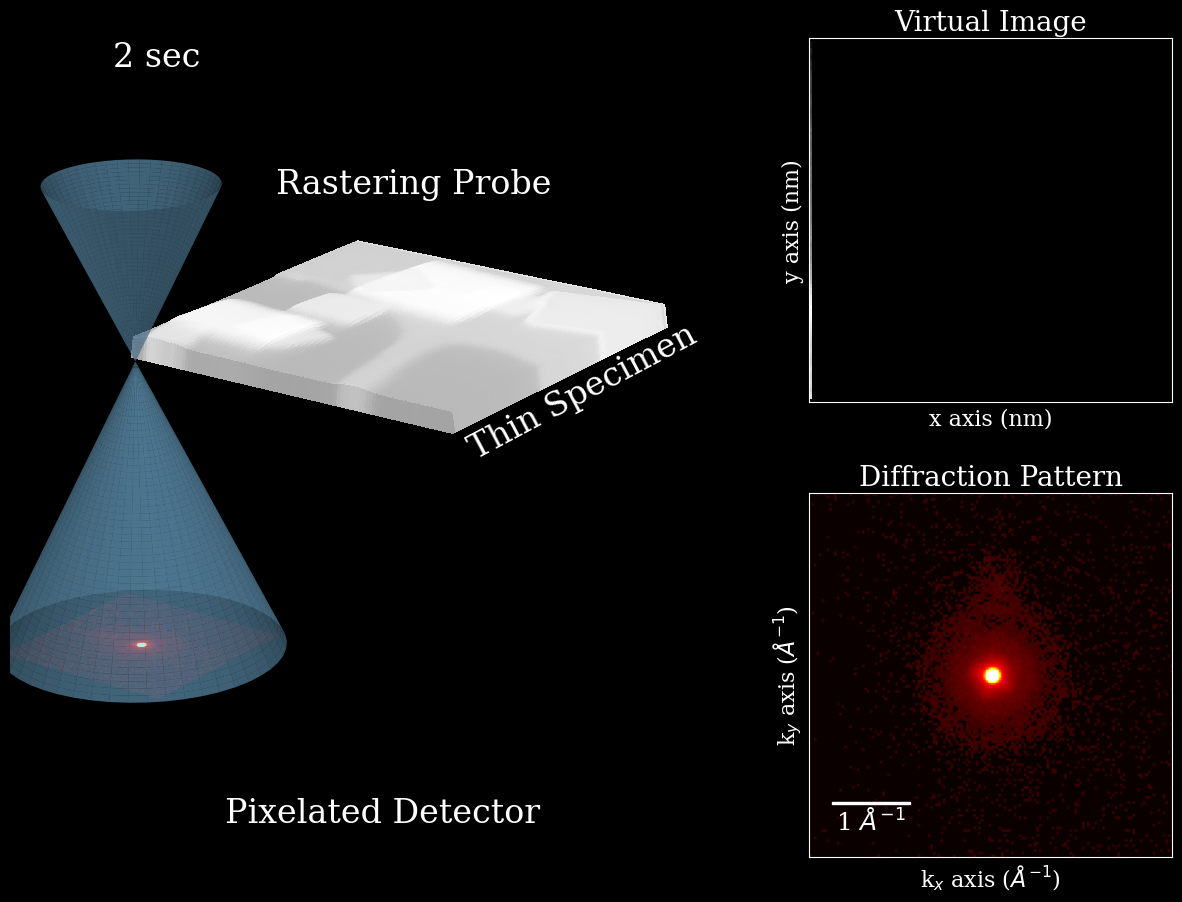

In [214]:
plt.style.use('dark_background')
fig = plt.figure()
from matplotlib.gridspec import GridSpec
fig.set_size_inches(15,15)


gs = GridSpec(2, 3,)
ax1 = fig.add_subplot(gs[:,0:2],
                      projection='3d',
                      computed_zorder=False)
ax2 = fig.add_subplot(gs[0,2],frameon=True)
ax3 = fig.add_subplot(gs[1,2],frameon=True)
ax2.axis("off")
ax3.axis("off")
fig.subplots_adjust(wspace=.1,hspace=-.35)
ax1.xaxis.pane.fill = True # Left pane
ax1.yaxis.pane.fill = True # Right pane

plot_stem_probe(stacked,
                signal_index=(0, 104, 2),
                probe_below=15,
                ax=ax1,
                ax1=ax2,
                ax2=ax3,
               navigator=nav)

In [193]:
%matplotlib inline

plt.style.use('dark_background')



In [92]:
r = hs.roi.CircleROI(0,0,0.2, 0.8)

In [93]:
nav = r(stacked, axes=(3,4)).nansum(axis=(3,4))

In [94]:
stacked.navigator=nav

In [137]:
indexes = list(np.ndindex(stacked.axes_manager.navigation_shape[::-1]))


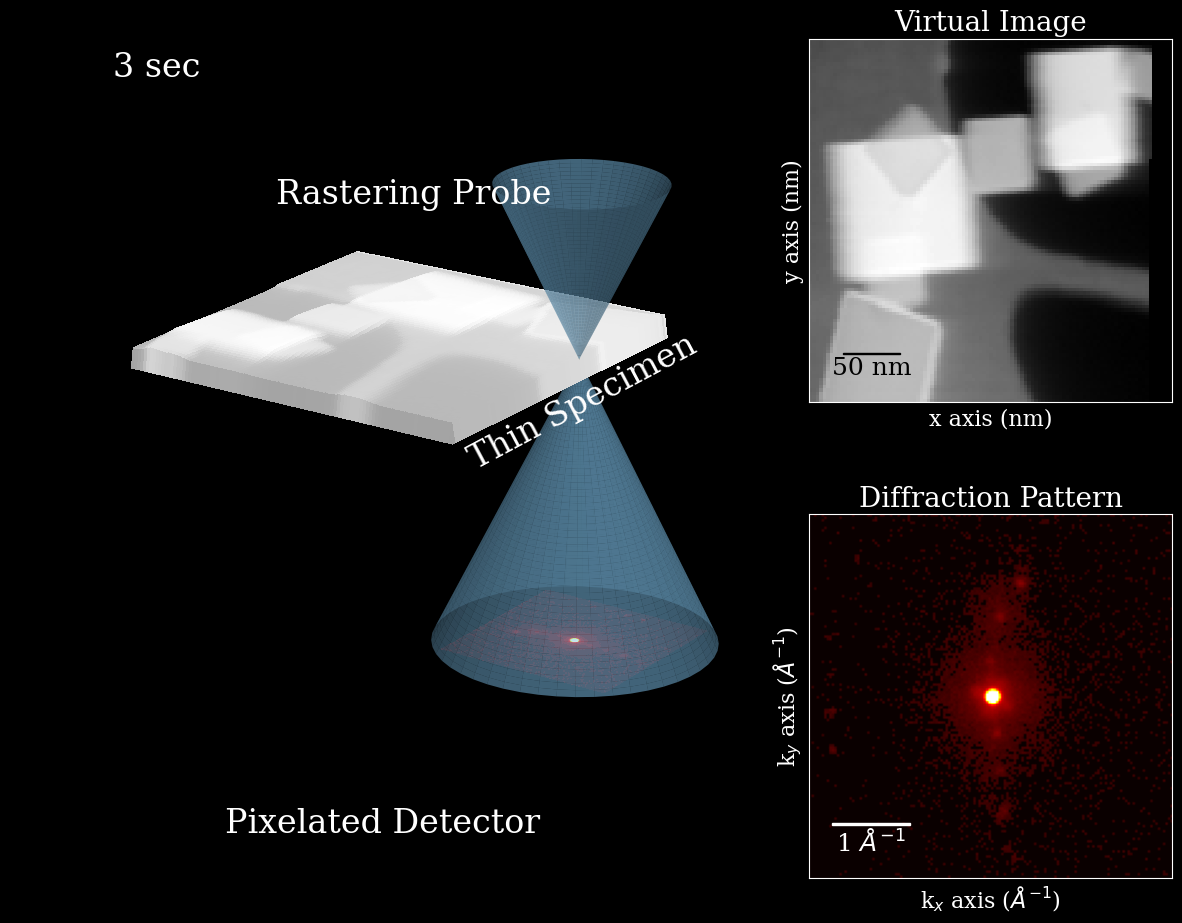

In [194]:
animate_4DSTEM(stacked, step=700, navigator=nav)

In [ ]:
fig = plt.figure()
from matplotlib.gridspec import GridSpec
fig.set_size_inches(15,15)

gs = GridSpec(2, 3,)
ax1 = fig.add_subplot(gs[:,0:2],
                      projection='3d',
                      computed_zorder=False,)
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,2])
ax2.axis("off")
ax3.axis("off")
fig.subplots_adjust(wspace=.1,hspace=-.4)

plot_stem_probe(s,
                signal_index=(35, 50),
                probe_below=15,
                ax=ax1,
                ax1=ax2,
                ax2=ax3, step=10)

In [ ]:
%%timeit
plot_stem_probe(s,
                signal_index=(35, 50),
                probe_below=15,
                ax=ax1,
                ax1=ax2,
                ax2=ax3, step=10)
#ax1.axis("on")

#fig.tight_layout()

[0.71052632 0.93518519]


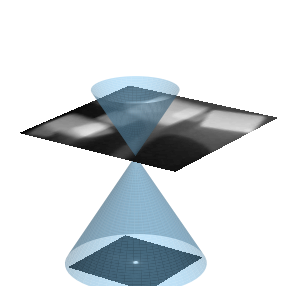

In [94]:
%matplotlib inline
plot_stem_probe(s,
                signal_index=(40,50),
                probe_below=15)


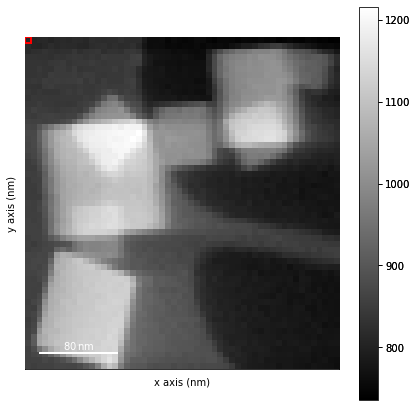

In [283]:
s.mean(axis=(2,3)).plot()

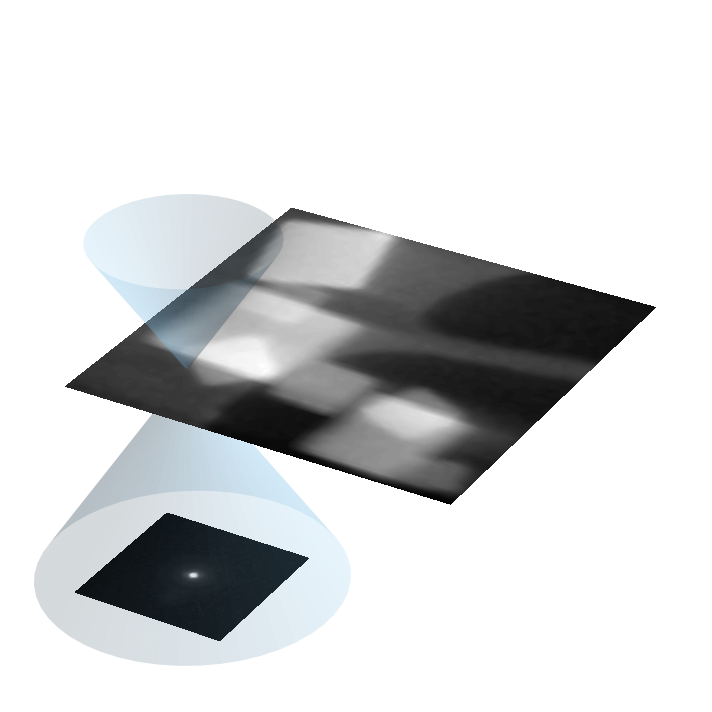

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

xx, yy = np.meshgrid(np.linspace(0, 1, 54), np.linspace(0, 1, 57))

X = xx
Y = yy
Z = 10 * np.ones(X.shape)

data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)
fig = plt.figure(figsize=(10,10))

#ax1 = fig.add_subplot(121)
#ax1.imshow(s.sum(axis=(2,3)).data, cmap="hot", interpolation='nearest', origin='lower', extent=[0, 1, 0, 1])

ax2 = fig.add_subplot(111, projection='3d')

ax2.axis("off")
ax2.contourf(X, Y, s.mean(axis=(3,2)).data, 100, zdir='z', offset=0, cmap="gray")
ax2.set_zlim(0,10)

ax2.set_zlim(-10,10)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid)*(z_grid/2) + center_x
    y_grid = radius*np.sin(theta_grid)*(z_grid/2) + center_y
    return x_grid,y_grid,z_grid

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,.05,9)
ax2.plot_surface(Xc, Yc, Zc, alpha=0.2, color="lightskyblue")

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,.05,-15)
ax2.plot_surface(Xc, Yc, Zc, alpha=0.2, color="lightskyblue")

xx, yy = np.meshgrid(np.linspace(0.0, 0.4, 72), np.linspace(0.0, 0.4, 72))

X = xx
Y = yy
Z = 10 * np.ones(X.shape)

ax2.contourf(X, Y, s.inav[0,0].data, 100, zdir='z', offset=-15, cmap="gray")
#ax2.view_init(10, 0)
plt.show()